# Problem Statement

The objective is to develop a predictive model for energy production in a combined-cycle power plant. 

The plant comprises gas turbines, steam turbines, and heat recovery steam generators, where electricity is generated through a combined cycle of gas and steam turbines, with energy transfer between turbines. 

The model will be based on exhaust vacuum and ambient variables. The aim is to enhance the power plant's performance by accurately predicting energy production.

# Data Set Details

This project focuses on predicting the variable of energy production. 
The dataset comprises 9568 observations collected over six years from a combined-cycle power plant operating at full load.

The dataset includes five variables:

Temperature: measured in degrees Celsius.

Exhaust Vacuum: measured in cm Hg.

Ambient Pressure: measured in millibar.

Relative Humidity: measured in percentage.

Energy Production: measured in MW, representing the net hourly electrical energy output.


# IMPORT LIBRARIES

In [1]:
# Imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

# Specific imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
import statsmodels.formula.api as smf 
from scipy.stats import shapiro
import pylab


# IMPORT DATASET

In [2]:
filepath="C:\\Users\\chakri\\Downloads\\energy_production.csv"
df=pd.read_csv(filepath,sep=';')

In [3]:
data=df.copy()

# Exploratory Data Analysis (EDA)

In [4]:
df.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

# CHECKING FOR DATA TYPES

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# DESCRIPTIVE ANALYSIS

In [6]:
df.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

# CHECKING FOR MISSING VALUES

In [7]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

These values indicate that there are no null (missing) values in any of the variables. All variables have a count of 0 null values, meaning the dataset is complete with no missing data for any of the variables.

# VISUALIZING MISSING VALUES

<Axes: >

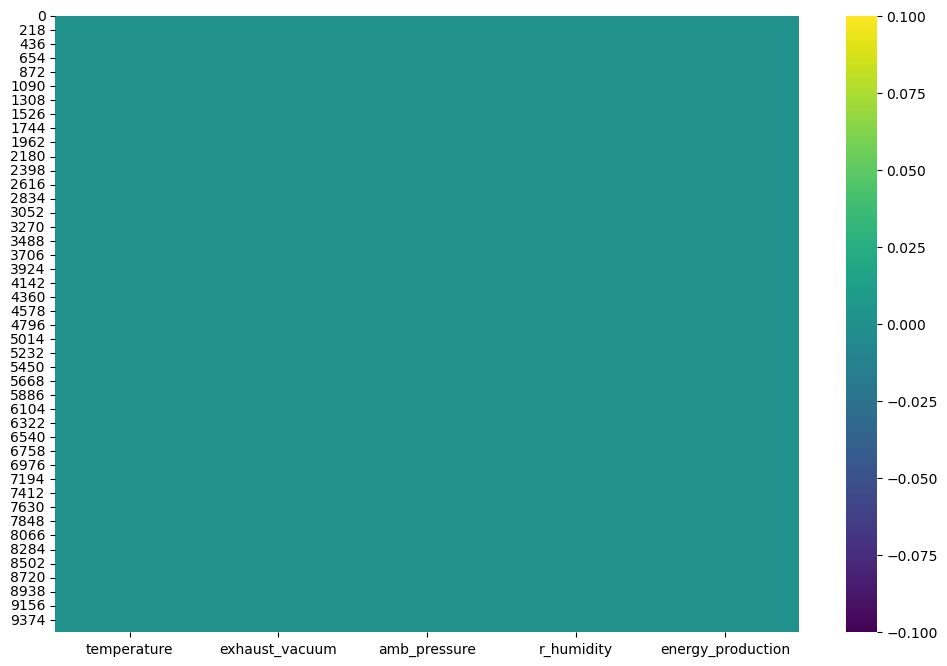

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [9]:
df[df.values==0.0]

Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []

In [10]:
df.shape

(9568, 5)

In [11]:
# Sweetviz

In [12]:
pip install pandas_profiling[notebook]

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install sweetviz

In [14]:
import sweetviz as sv
sweet_report=sv.analyze(df)
sweet_report.show_html("energy_production")

                                             |                                             | [  0%]   00:00 ->…

Report energy_production was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# CHECKING OF DUPLICATE VALUES

In [15]:
df[df.duplicated()].shape

(41, 5)

In [16]:
df[df.duplicated()]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

# REMOVING DUPLICATE VALUES

In [17]:
df1 = df.drop_duplicates()

In [18]:
df1[df1.duplicated()]

Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []

In [19]:
sweet_report=sv.analyze(df1)
sweet_report.show_html("energy_production")

                                             |                                             | [  0%]   00:00 ->…

Report energy_production was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
# Skewness
skewness = df1.skew()
print("Skewness:")
print(skewness)

Skewness:
temperature         -0.136107
exhaust_vacuum       0.196819
amb_pressure         0.273846
r_humidity          -0.435138
energy_production    0.305791
dtype: float64


Temperature and Ambient Pressure have slightly negative skewness.

Exhaust Vacuum has slightly positive skewness.

Relative Humidity has more pronounced negative skewness.

Energy Production has positive skewness.

In [21]:
# Kurtosis
kurtosis = df.kurtosis()
print("\nKurtosis:")
print(kurtosis)


Kurtosis:
temperature         -1.037549
exhaust_vacuum      -1.444337
amb_pressure         0.094237
r_humidity          -0.444526
energy_production   -1.048521
dtype: float64


Temperature, Exhaust Vacuum, and Energy Production have negative kurtosis, indicating distributions with lighter tails than a normal distribution.

Ambient Pressure has positive kurtosis, indicating a distribution with slightly heavier tails than a normal distribution.

Relative Humidity has slightly negative kurtosis, suggesting a distribution with lighter tails.

# EXPLORATORY DATA ANALYSIS

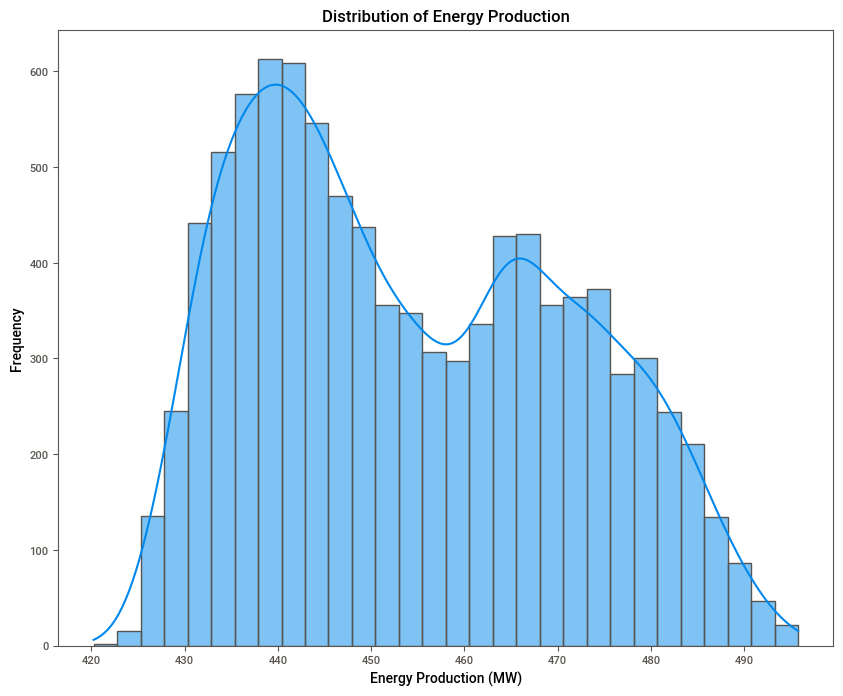

In [22]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df1, x='energy_production', bins=30, kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production (MW)')
plt.ylabel('Frequency')
plt.show()

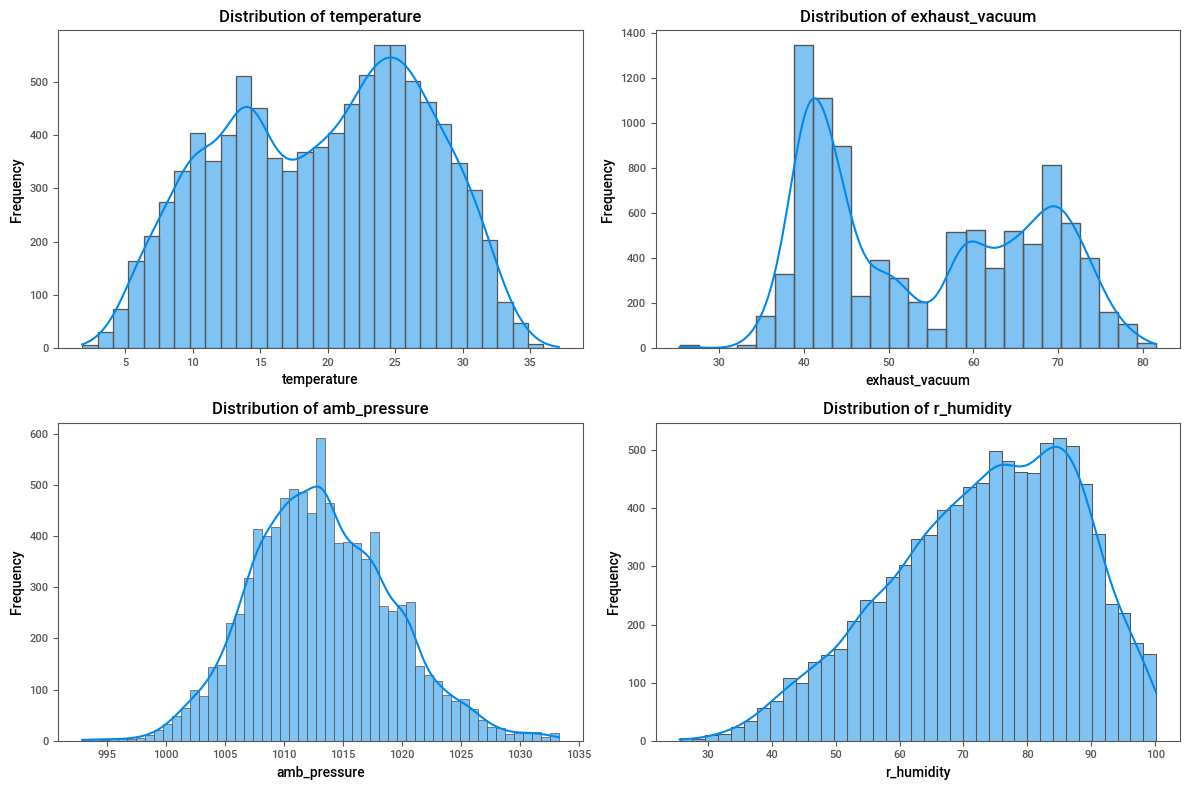

In [23]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df1.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

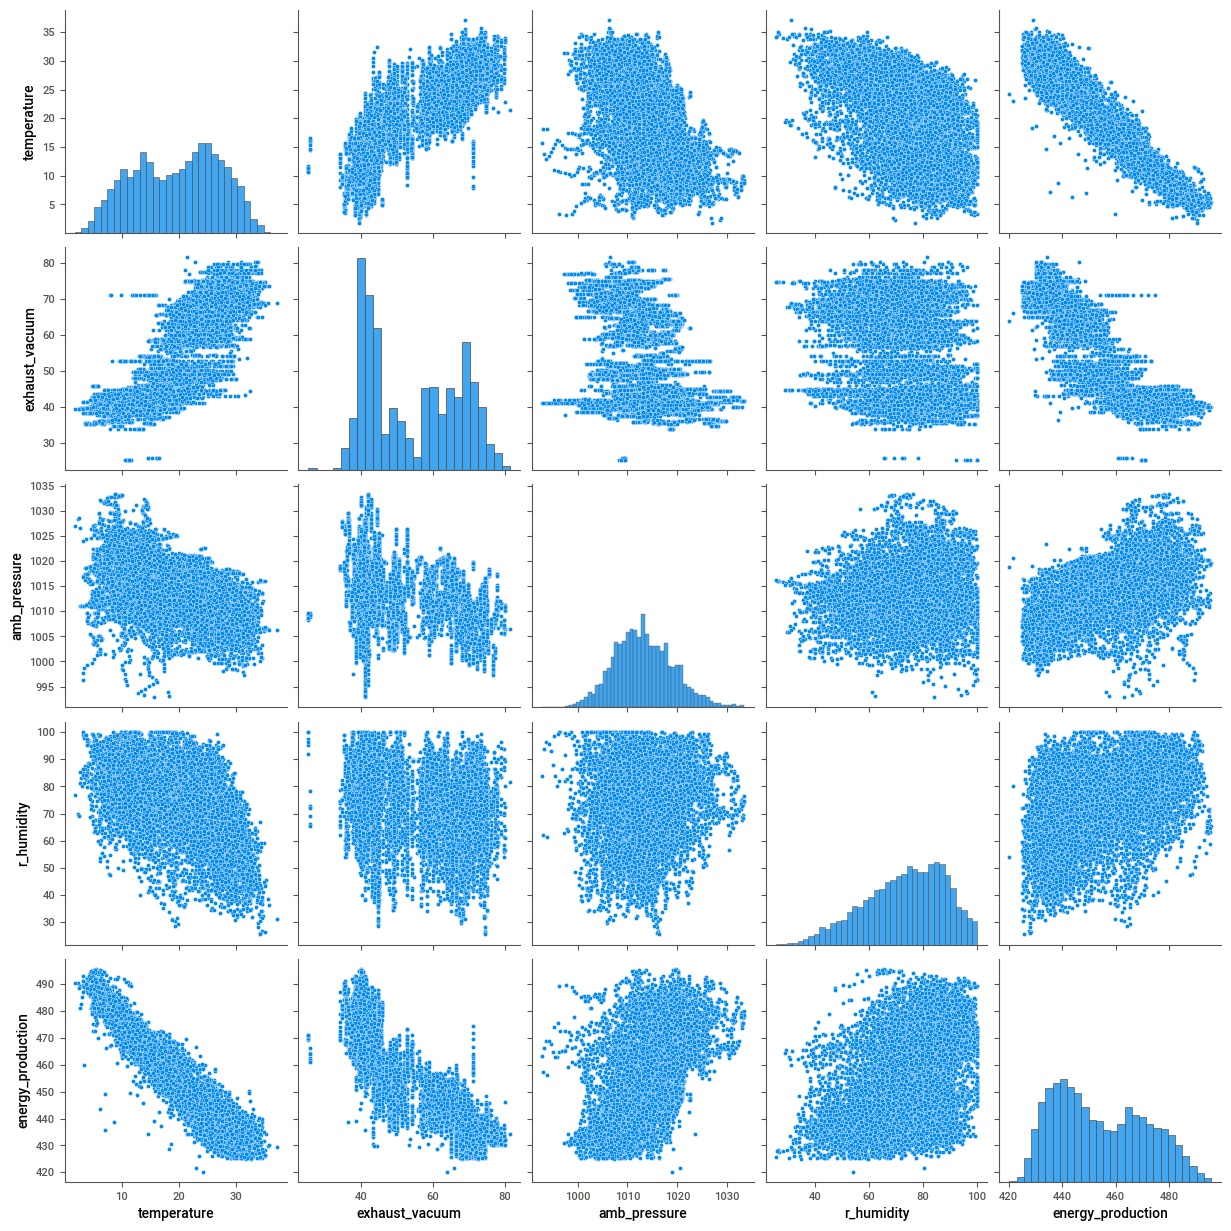

In [24]:
sns.pairplot(data=df1)

In [25]:
df1.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843689     -0.508222   -0.543947   
exhaust_vacuum        0.843689        1.000000     -0.415718   -0.312214   
amb_pressure         -0.508222       -0.415718      1.000000    0.101631   
r_humidity           -0.543947       -0.312214      0.101631    1.000000   
energy_production    -0.947908       -0.869900      0.518687    0.391175   

                   energy_production  
temperature                -0.947908  
exhaust_vacuum             -0.869900  
amb_pressure                0.518687  
r_humidity                  0.391175  
energy_production           1.000000

Temperature and Energy Production have a strong negative correlation (-0.947908).

Exhaust Vacuum and Energy Production also have a strong negative correlation (-0.869900).

Ambient Pressure and Energy Production have a moderate positive correlation (0.518687).

Relative Humidity and Energy Production have a moderate positive correlation (0.391175).

Correlation coefficients measure the strength and direction of the linear relationship between two variables. A value close to 1 or -1 indicates a strong correlation, while a value close to 0 indicates a weak correlation. 

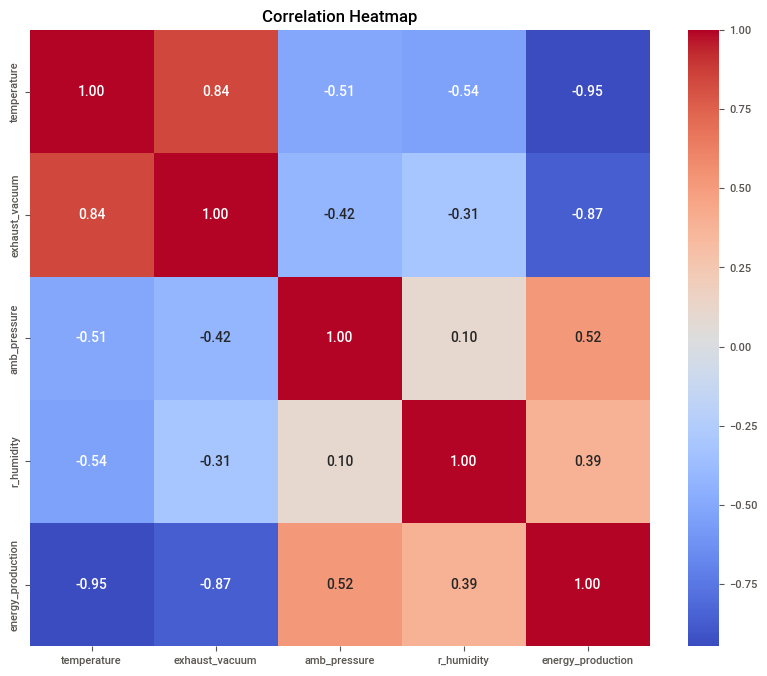

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
def find_outliers(df):
    # Calculate the first and third quartiles
    Q1 = np.percentile(df1, 25)
    Q3 = np.percentile(df1, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return outliers

Text(0.5, 1.0, 'Box Plot for Temperature')

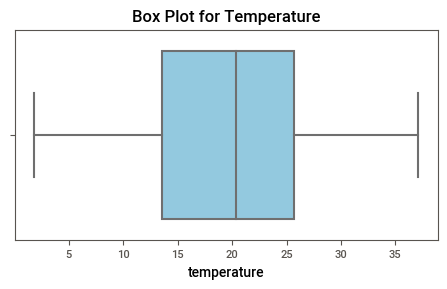

In [28]:
# Box plots to check for outliers
plt.figure(figsize=(12, 6))

# Box plot for temperature
plt.subplot(2, 2, 1)
sns.boxplot(x=df1['temperature'], color='skyblue')
plt.title('Box Plot for Temperature')

Text(0.5, 1.0, 'Box Plot for Exhaust Vacuum')

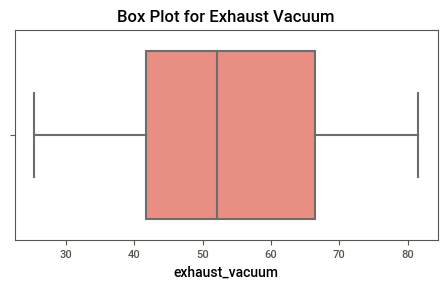

In [29]:
# Box plot for exhaust vacuum
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
sns.boxplot(x=df1['exhaust_vacuum'], color='salmon')
plt.title('Box Plot for Exhaust Vacuum')

Text(0.5, 1.0, 'Box Plot for Ambient Pressure')

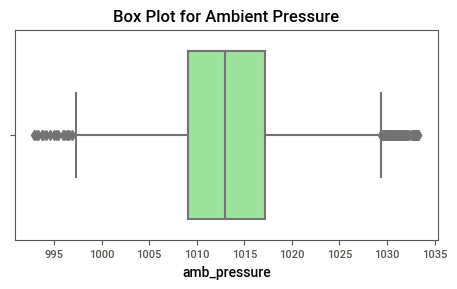

In [30]:
# Box plot for ambient pressure
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.boxplot(x=df1['amb_pressure'], color='lightgreen')
plt.title('Box Plot for Ambient Pressure')

Text(0.5, 1.0, 'Box Plot for Relative Humidity')

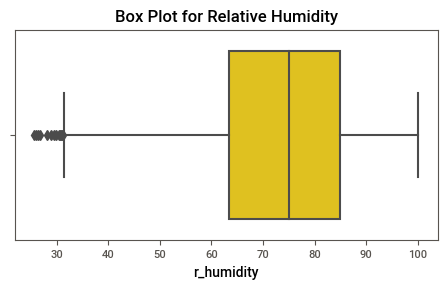

In [31]:
# Box plot for relative humidity
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
sns.boxplot(x=df1['r_humidity'], color='gold')
plt.title('Box Plot for Relative Humidity')

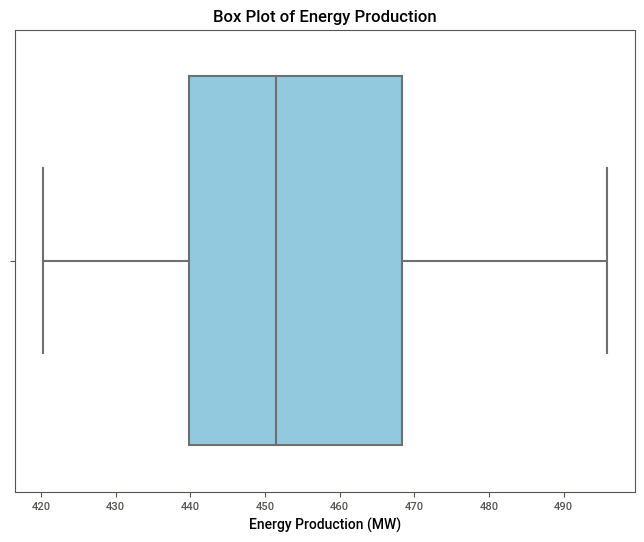

In [32]:
#box plot for 'energy_production'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['energy_production'], color='skyblue')
plt.title('Box Plot of Energy Production')
plt.xlabel('Energy Production (MW)')
plt.show()

In [33]:
first_quartile = df1.quantile(0.25)
print("First Quartile (25th percentile):", first_quartile)

First Quartile (25th percentile): temperature            13.530
exhaust_vacuum         41.740
amb_pressure         1009.085
r_humidity             63.375
energy_production     439.750
Name: 0.25, dtype: float64


In [34]:
second_quartile = df1.quantile(0.50)
print("Second Quartile (Median or 50th percentile):", second_quartile)

Second Quartile (Median or 50th percentile): temperature            20.35
exhaust_vacuum         52.08
amb_pressure         1012.92
r_humidity             75.00
energy_production     451.52
Name: 0.5, dtype: float64


In [35]:
third_quartile = df1.quantile(0.75)
print("Third Quartile (75th percentile):", third_quartile)

Third Quartile (75th percentile): temperature            25.710
exhaust_vacuum         66.510
amb_pressure         1017.200
r_humidity             84.850
energy_production     468.365
Name: 0.75, dtype: float64


In [36]:
iqr = third_quartile - first_quartile
print("Inter-Quartile Range (IQR):", iqr)

Inter-Quartile Range (IQR): temperature          12.180
exhaust_vacuum       24.770
amb_pressure          8.115
r_humidity           21.475
energy_production    28.615
dtype: float64


In [37]:
upper_whisker = third_quartile + 1.5 * iqr
print("Upper Whisker:", upper_whisker)

Upper Whisker: temperature            43.9800
exhaust_vacuum        103.6650
amb_pressure         1029.3725
r_humidity            117.0625
energy_production     511.2875
dtype: float64


In [38]:
lower_whisker = first_quartile - 1.5 * iqr
print("Lower Whisker:", lower_whisker)

Lower Whisker: temperature           -4.7400
exhaust_vacuum         4.5850
amb_pressure         996.9125
r_humidity            31.1625
energy_production    396.8275
dtype: float64


# Prepare a Model

In [39]:


# Split the dataset into features (X) and target variable (y)
X = df1[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]
y = df1['energy_production']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:


# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Once the model is trained, you can use it to make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using appropriate metrics
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 20.8782388579529
R-squared: 0.9283024922947181


# OLS MODEL

In [41]:

#  the independent variables (features)
X = df1[['exhaust_vacuum', 'amb_pressure', 'r_humidity', 'temperature']]

# Add a constant term to the features
X = sm.add_constant(X)

# the dependent variable
y = df1['energy_production']

# OLS regression model
raw_model = sm.OLS(y, X).fit()
raw_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.088e+04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:21:17   Log-Likelihood:                -27970.
No. Observations:                9527   AIC:                         5.595e+04
Df Residuals:                    9522   BIC:                         5.599e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            456.1291      9.767     46.703      0.000     436.984     475.274
exhaust_vacuum    -0.2361      0.007    -32.315      0.000      -0.250      -0.222
amb_pressure       0.0606      0.009      6.391      0.000       0.042       0.079
r_humidity        -0.1573      0.004    -37.623      0.000      -0.166      -0.149
temperature       -1.9736      0.015   -128.729      0.000      -2.004      -1.944
==============================================================================
Omnibus:                      886.133   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4074.434
Skew:                          -0.349   Prob(JB):                         0.00
Kurtosis:                       6.127   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
raw_model.params

const             456.129093
exhaust_vacuum     -0.236060
amb_pressure        0.060555
r_humidity         -0.157314
temperature        -1.973566
dtype: float64

# Let's try Median Imputation to handle Outlier

In [43]:
df3=df1.copy()

In [44]:
df_median_imputed = df3.copy()

In [45]:
median_energy_production = df1['r_humidity'].median()

In [46]:
median_r_humidity = df3['r_humidity'].median()
print("Median r_humidity:", median_r_humidity)

Median r_humidity: 75.0


Text(0.5, 1.0, 'r_humidity before median imputation')

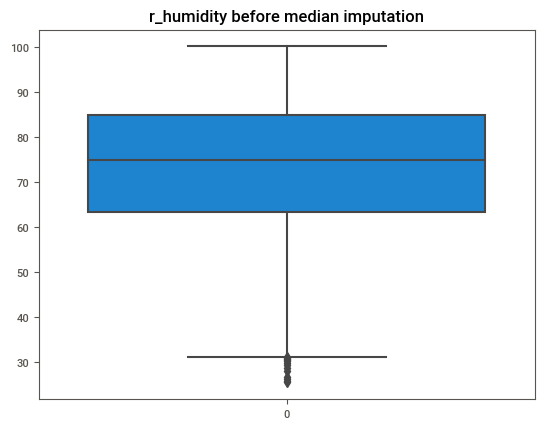

In [47]:
sns.boxplot(df1['r_humidity'])
plt.title('r_humidity before median imputation')

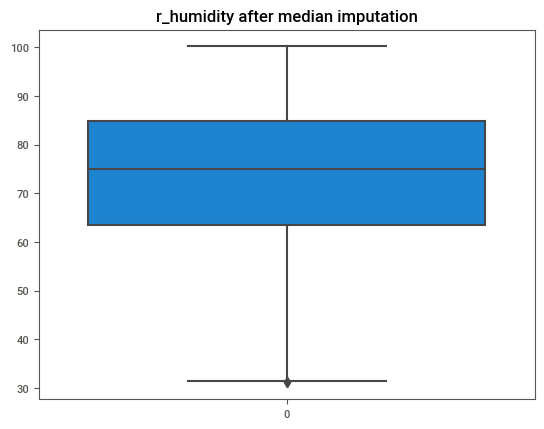

In [48]:
for i in df3['r_humidity']:
    q1 = np.quantile(df.r_humidity,0.25)
    q3 = np.quantile(df.r_humidity,0.75)
    med = np.median(df.r_humidity)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['r_humidity'] = df3['r_humidity'].replace(i, np.median(df3['r_humidity']))
sns.boxplot(df3['r_humidity'])
plt.title('r_humidity after median imputation')
plt.show()

Median Amb_pressure: 1012.92


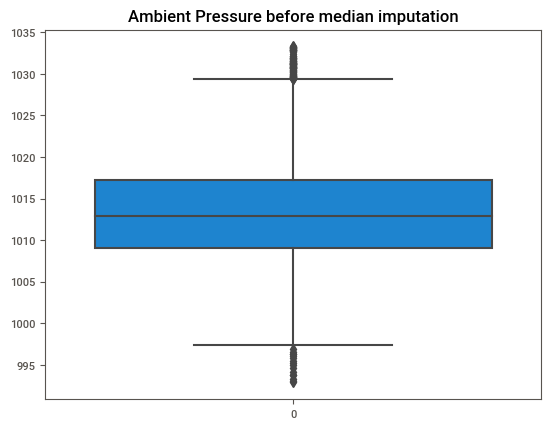

In [49]:
# Calculate the median ambient pressure
median_amb_pressure = df3['amb_pressure'].median()

# Create a copy of the DataFrame


# Display median humidity
print("Median Amb_pressure:", median_amb_pressure)

# Display boxplot before median imputation
sns.boxplot(df3['amb_pressure'])
plt.title('Ambient Pressure before median imputation')
plt.show()


In [50]:

# Perform median imputation for outliers in the 'amb_pressure' column
for i in df3['amb_pressure']:
    q1 = np.quantile(df.amb_pressure, 0.25)
    q3 = np.quantile(df.amb_pressure, 0.75)
    med = np.median(df.amb_pressure)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    if i > upper_bound or i < lower_bound:
        df3['amb_pressure'] = df3['amb_pressure'].replace(i, np.median(df3['amb_pressure']))


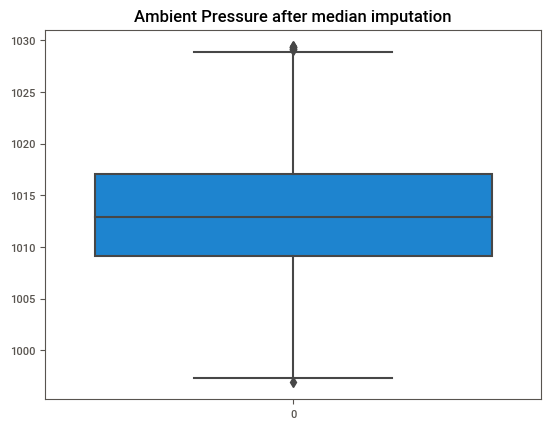

In [51]:
sns.boxplot(df3['amb_pressure'])
plt.title('Ambient Pressure after median imputation')
plt.show()

Observation: As you can see after median imputation the model is not performing well

In [52]:


X = df3[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]
y = df3['energy_production']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 20.971948475645085
R-squared: 0.9279806861269538


In [57]:

df_median_imputed=df3
# Define the independent variables (features)
X_median = df_median_imputed[['exhaust_vacuum', 'amb_pressure', 'r_humidity', 'temperature']]

# Add a constant term to the features
X_median = sm.add_constant(X_median)

# Define the dependent variable
y_median = df_median_imputed['energy_production']

# Fit OLS regression model
model_median_imputation = sm.OLS(y_median, X_median).fit()
model_median_imputation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.085e+04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:21:32   Log-Likelihood:                -27974.
No. Observations:                9527   AIC:                         5.596e+04
Df Residuals:                    9522   BIC:                         5.599e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            440.5072     10.141     43.438      0.000     420.628     460.386
exhaust_vacuum    -0.2378      0.007    -32.605      0.000      -0.252      -0.224
amb_pressure       0.0758      0.010      7.692      0.000       0.056       0.095
r_humidity        -0.1558      0.004    -37.268      0.000      -0.164      -0.148
temperature       -1.9632      0.015   -129.037      0.000      -1.993      -1.933
==============================================================================
Omnibus:                      886.047   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4047.171
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.114   Cond. No.                     2.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model_median_imputation.params

const             440.507226
exhaust_vacuum     -0.237824
amb_pressure        0.075775
r_humidity         -0.155798
temperature        -1.963241
dtype: float64

# Let's try Mean Imputation to handle Outlier¶

In [59]:

mean_amb_pressure = df1['amb_pressure'].mean()

print("Mean Amb_pressure:", mean_amb_pressure)


Mean Amb_pressure: 1013.2370840768342


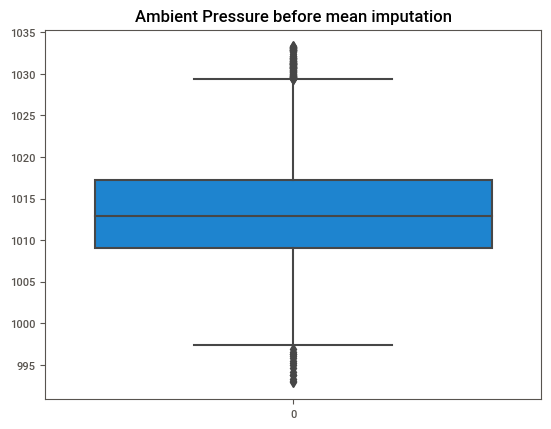

In [60]:
#  boxplot before mean imputation
sns.boxplot(df1['amb_pressure'])
plt.title('Ambient Pressure before mean imputation')
plt.show()

In [61]:
# Perform mean imputation for outliers in the 'amb_pressure' column
for i in df3['amb_pressure']:
    q1 = np.quantile(df.amb_pressure, 0.25)
    q3 = np.quantile(df.amb_pressure, 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    if i > upper_bound or i < lower_bound:
        df3['amb_pressure'] = df3['amb_pressure'].replace(i, mean_amb_pressure)

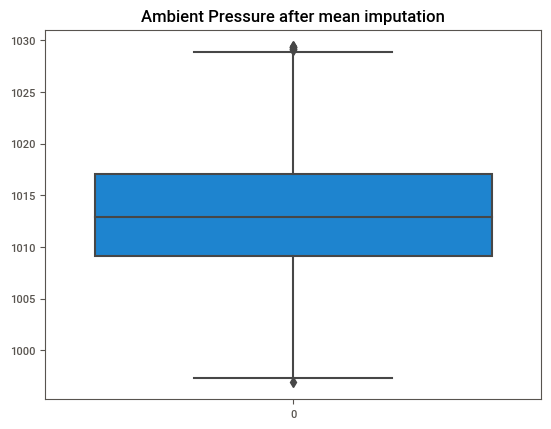

In [62]:

# Display boxplot after mean imputation
sns.boxplot(df3['amb_pressure'])
plt.title('Ambient Pressure after mean imputation')
plt.show()

In [63]:
# Split the dataset into features (X) and target variable (y)
X = df3[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]
y = df3['energy_production']


In [64]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [66]:

# Predict the target variable on the test set
y_pred = model.predict(X_test)


In [67]:

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 20.971948475645085
R-squared: 0.9279806861269538


In [68]:
import statsmodels.api as sm
df_mean_imputed=df3
# Define the independent variables (features)
X_mean = df_mean_imputed[['exhaust_vacuum', 'amb_pressure', 'r_humidity', 'temperature']]

# Add a constant term to the features
X_mean = sm.add_constant(X_mean)

# Define the dependent variable
y_mean = df_mean_imputed['energy_production']

# Fit OLS regression model
mean_imputed_model = sm.OLS(y_mean, X_mean).fit()
mean_imputed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.085e+04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:21:37   Log-Likelihood:                -27974.
No. Observations:                9527   AIC:                         5.596e+04
Df Residuals:                    9522   BIC:                         5.599e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            440.5072     10.141     43.438      0.000     420.628     460.386
exhaust_vacuum    -0.2378      0.007    -32.605      0.000      -0.252      -0.224
amb_pressure       0.0758      0.010      7.692      0.000       0.056       0.095
r_humidity        -0.1558      0.004    -37.268      0.000      -0.164      -0.148
temperature       -1.9632      0.015   -129.037      0.000      -1.993      -1.933
==============================================================================
Omnibus:                      886.047   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4047.171
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.114   Cond. No.                     2.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
mean_imputed_model.params

const             440.507226
exhaust_vacuum     -0.237824
amb_pressure        0.075775
r_humidity         -0.155798
temperature        -1.963241
dtype: float64

In [70]:
df3.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

Observation: As you can see after mean imputation the model is not performing well

# Visualizing the Distribution of Independent Features with the help of Histograms

In [71]:

feature = ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']
def plot_data(df3, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df3[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df3[feature], dist='norm', plot=pylab)


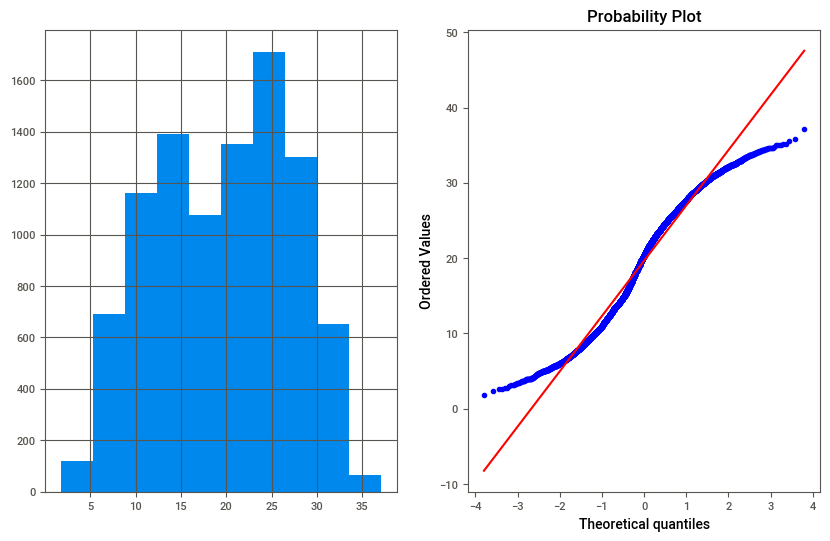

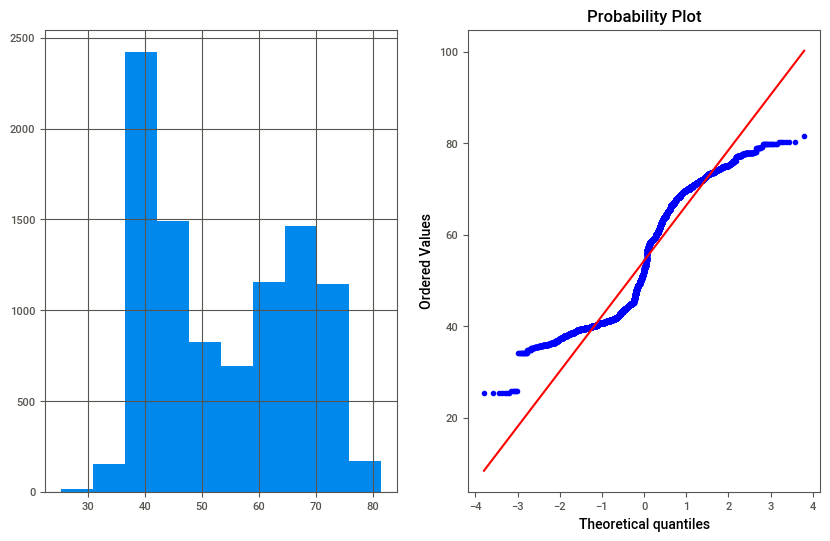

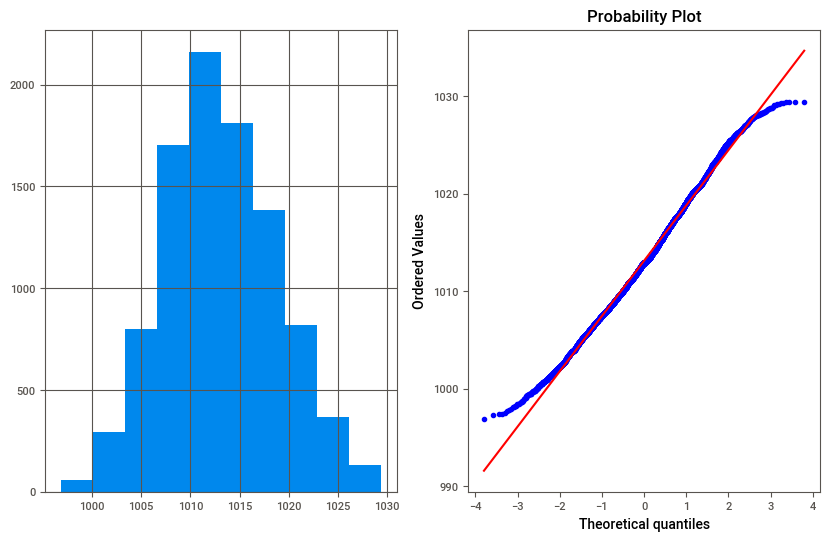

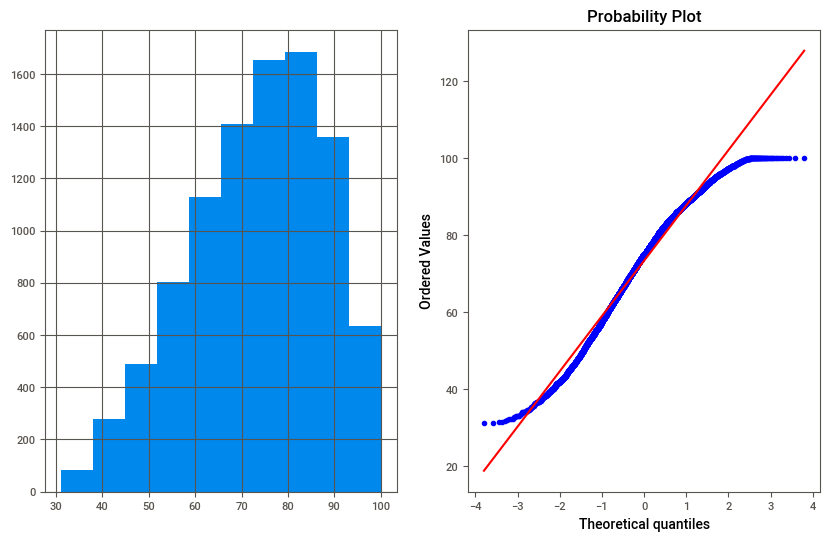

In [72]:
plot_data(df3, 'temperature')
plt.show()
plot_data(df3, 'exhaust_vacuum')
plt.show()
plot_data(df3, 'amb_pressure')
plt.show()
plot_data(df3, 'r_humidity')
plt.show()

# The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

In [73]:
from scipy.stats import shapiro
statistic, p_value = shapiro(df3)

print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05  # Significance level
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")


Shapiro-Wilk Test Statistic: 0.7257695198059082
P-value: 0.0
The data does not follow a normal distribution (reject H0)


Observation: Since the p-values are not less than .05, we fail to reject the null hypothesis.
We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

# Visualizing the Relation between each independent Feature with respect to the Dependent Feature

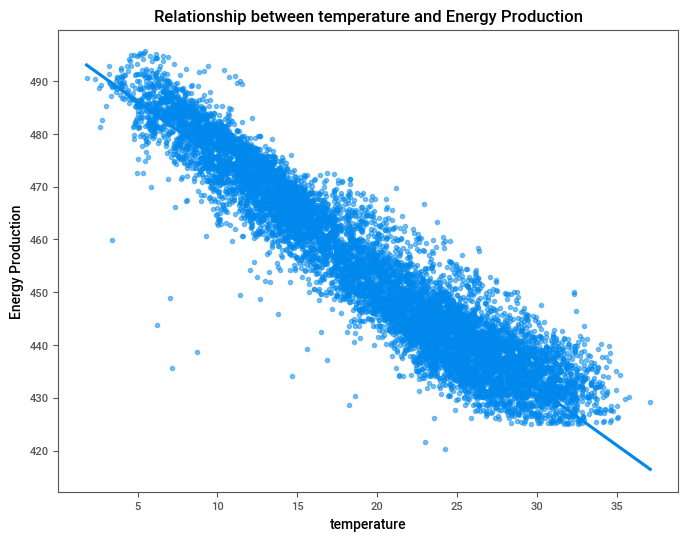

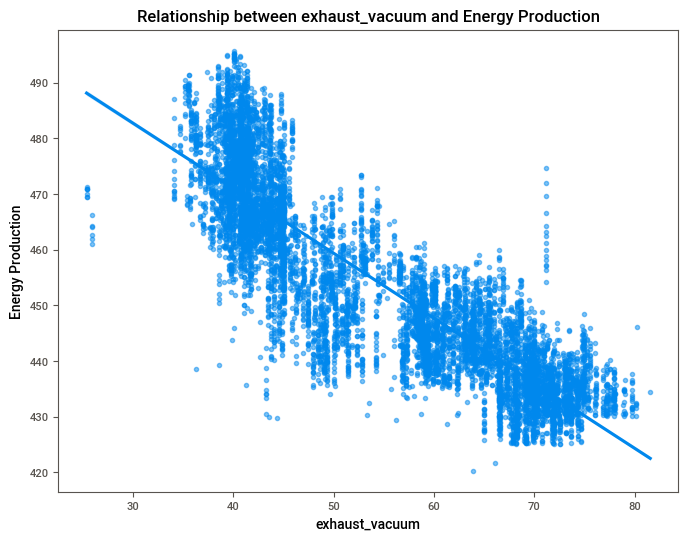

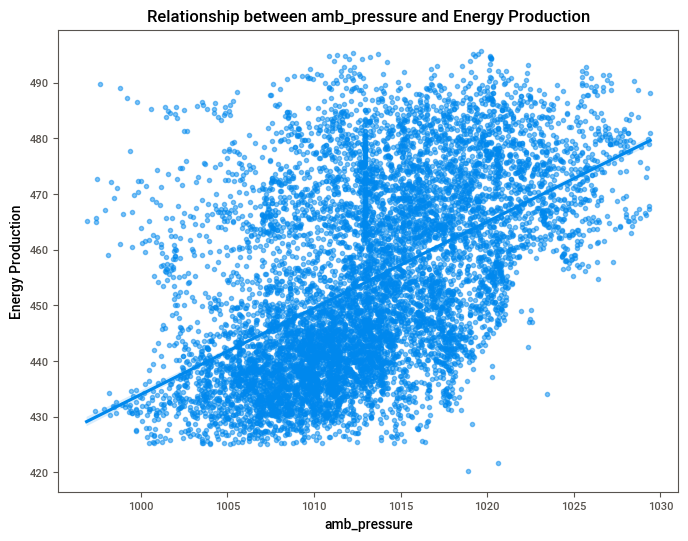

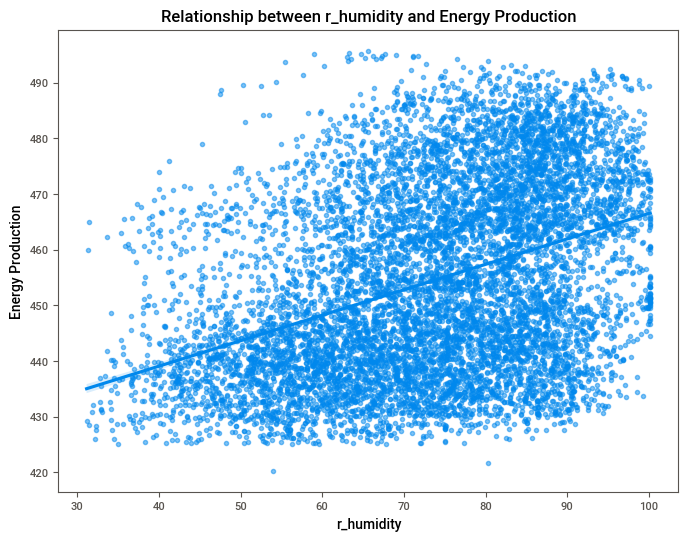

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df3.columns:
    if column != 'energy_production':  
        plt.figure(figsize=(8, 6))
        sns.regplot(x=column, y='energy_production', data=df3, scatter_kws={'alpha':0.5})
        plt.title(f'Relationship between {column} and Energy Production')
        plt.xlabel(column)
        plt.ylabel('Energy Production')
        plt.show()


temperature feature has a good linear relation with energy production as compare to other features

In [75]:
df3.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843689     -0.504947   -0.542091   
exhaust_vacuum        0.843689        1.000000     -0.415162   -0.311201   
amb_pressure         -0.504947       -0.415162      1.000000    0.107990   
r_humidity           -0.542091       -0.311201      0.107990    1.000000   
energy_production    -0.947908       -0.869900      0.517536    0.390033   

                   energy_production  
temperature                -0.947908  
exhaust_vacuum             -0.869900  
amb_pressure                0.517536  
r_humidity                  0.390033  
energy_production           1.000000

<Axes: >

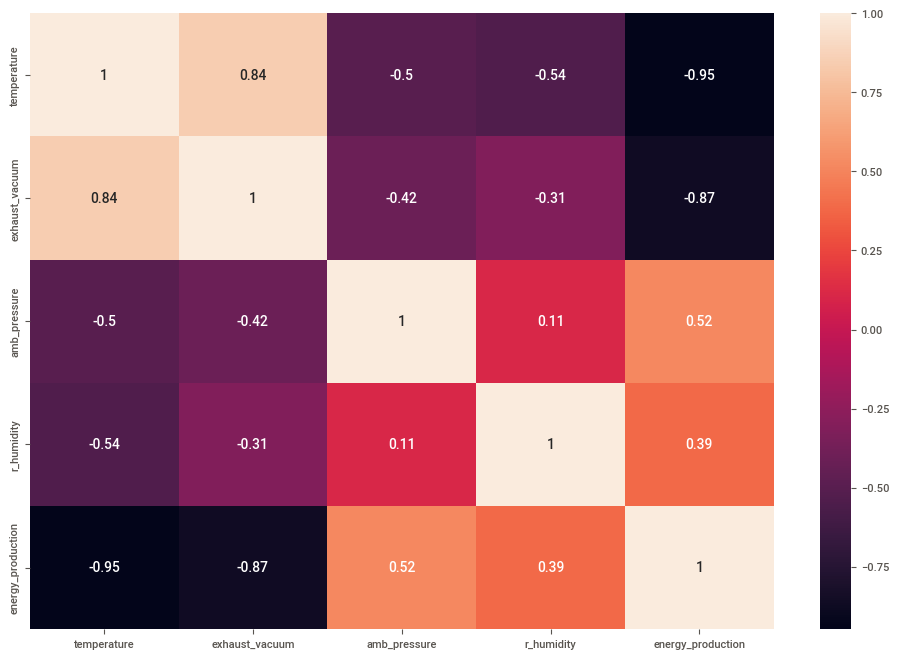

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df3.corr(),
    annot=True)

# Plotting Correlation on a Pair Plot

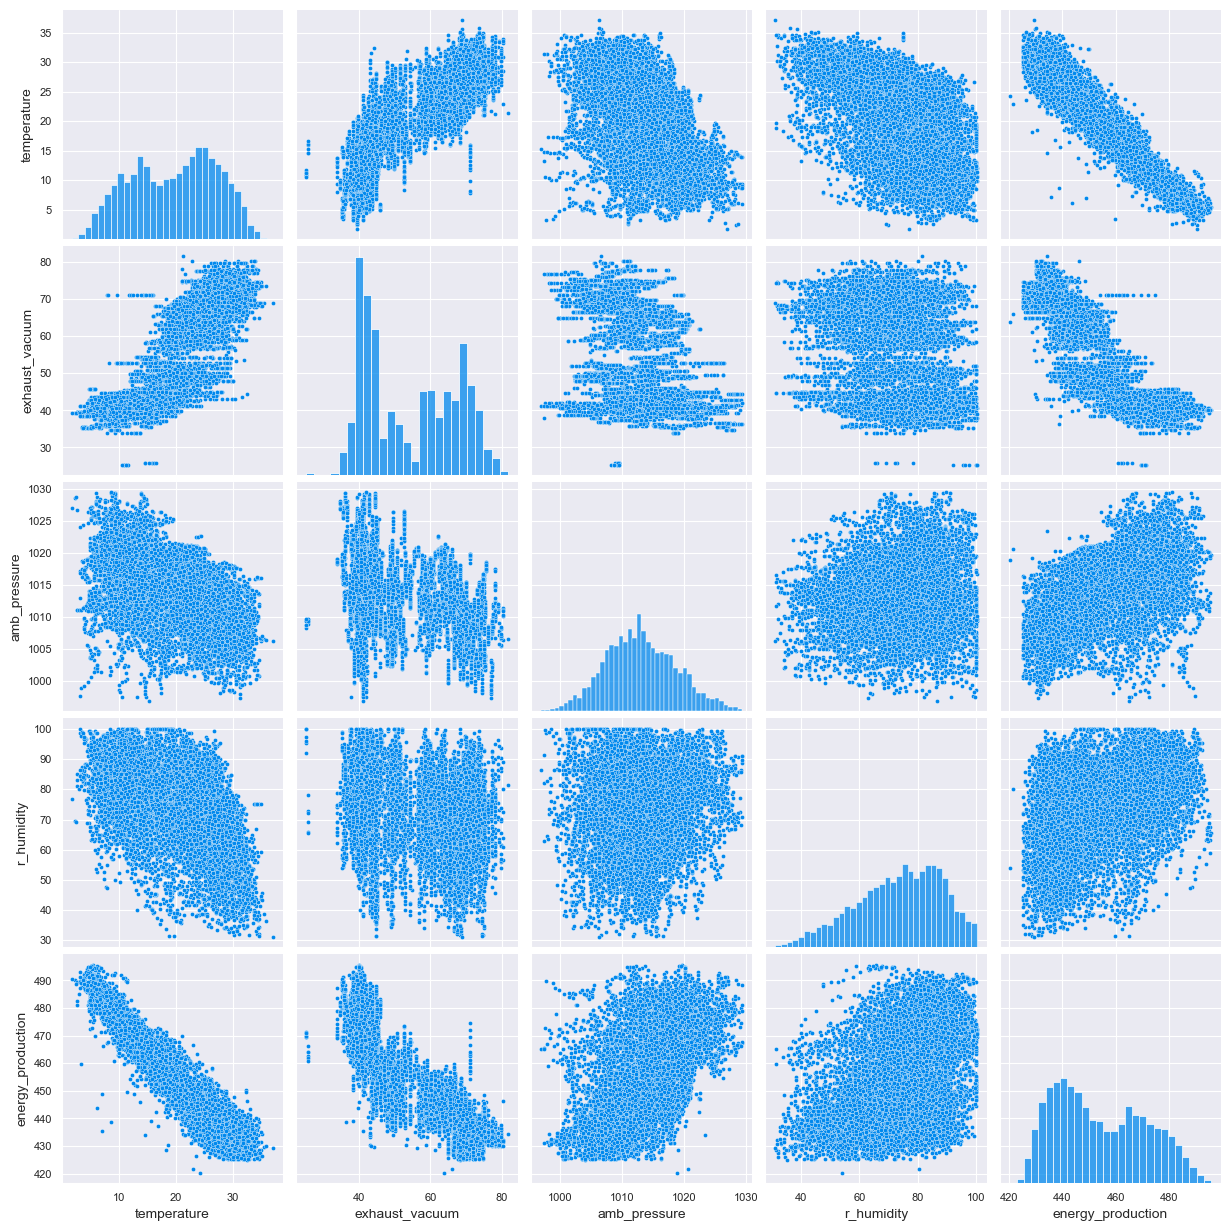

In [77]:
sns.set_style(style='darkgrid')
sns.pairplot(df3)

# Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores


# Applying Standard Scaler

In [78]:
from sklearn.preprocessing import StandardScaler
df_standard_scaled = df3.copy()
continuous_feature = ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity','energy_production']
features = df_standard_scaled[continuous_feature]
scaler = StandardScaler()

In [79]:
df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0    -1.352528       -1.240254      0.684456   -0.915514           1.582568
1    -1.023404       -0.942279      1.161852    1.465321           0.647023
2    -0.777569       -0.726287      1.989808    0.571389           0.654066
3    -0.797719        0.000519      0.839477    0.391638           0.746212
4    -0.606961       -0.366826      1.877065    0.110648           0.542551

Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [80]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 temperature         -0.0
exhaust_vacuum       0.0
amb_pressure        -0.0
r_humidity          -0.0
energy_production    0.0
dtype: float64 
Standard Devaition 
 temperature          1.0
exhaust_vacuum       1.0
amb_pressure         1.0
r_humidity           1.0
energy_production    1.0
dtype: float64 1


# VIF

In [81]:
import statsmodels.formula.api as smf

# Calculate R-squared for temperature
rsq_temperature = smf.ols('temperature ~ exhaust_vacuum + amb_pressure + r_humidity', data=df1).fit().rsquared
vif_temperature = 1 / (1 - rsq_temperature)

# Calculate R-squared for exhaust_vacuum
rsq_exhaust_vacuum = smf.ols('exhaust_vacuum ~ temperature + amb_pressure + r_humidity', data=df1).fit().rsquared
vif_exhaust_vacuum = 1 / (1 - rsq_exhaust_vacuum)

# Calculate R-squared for amb_pressure
rsq_amb_pressure = smf.ols('amb_pressure ~ temperature + exhaust_vacuum + r_humidity', data=df1).fit().rsquared
vif_amb_pressure = 1 / (1 - rsq_amb_pressure)

# Calculate R-squared for r_humidity
rsq_r_humidity = smf.ols('r_humidity ~ temperature + amb_pressure + exhaust_vacuum', data=df1).fit().rsquared
vif_r_humidity = 1 / (1 - rsq_r_humidity)

# Store VIF values in a DataFrame
d1 = {'variables': ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'], 'VIF': [vif_temperature, vif_exhaust_vacuum, vif_amb_pressure, vif_r_humidity]}
VIF_frame = pd.DataFrame(d1)

VIF_frame


variables       VIF
0     temperature  5.968554
1  exhaust_vacuum  3.935221
2    amb_pressure  1.451793
3      r_humidity  1.709384

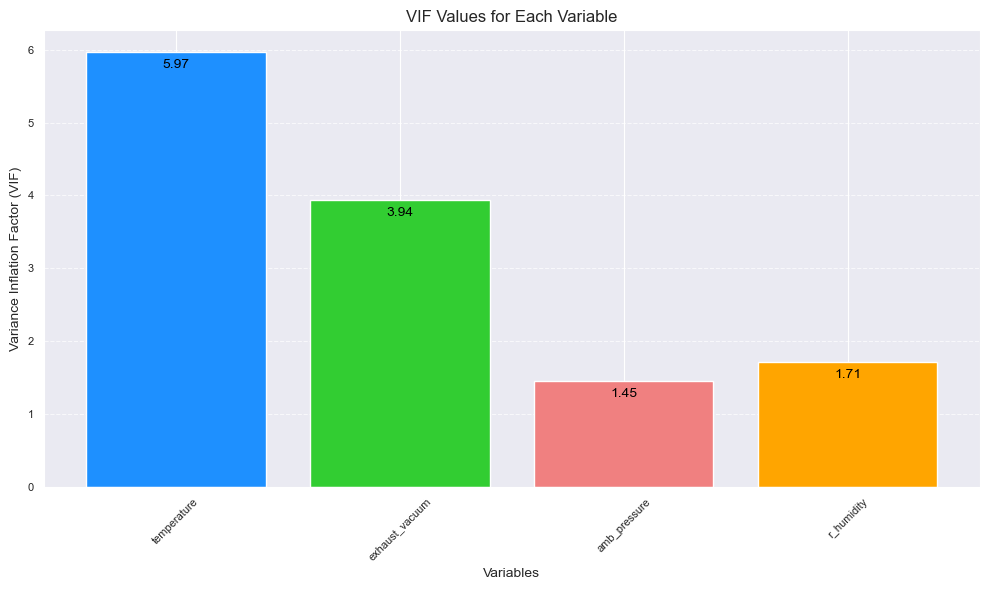

In [82]:
import matplotlib.pyplot as plt

# Define variables and their corresponding VIF values
variables = ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']
vif_values = [5.968554, 3.935221, 1.451793, 1.709384]

# Define unique attractive colors
colors = ['dodgerblue', 'limegreen', 'lightcoral', 'orange']

# Create a bar plot with colors
plt.figure(figsize=(10, 6))
bars = plt.bar(variables, vif_values, color=colors)

# Add data labels to each bar
for bar, value in zip(bars, vif_values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 0.1, 
             round(value, 2),
             ha='center', va='top', color='black')

plt.xlabel('Variables')
plt.ylabel('Variance Inflation Factor (VIF)')
plt.title('VIF Values for Each Variable')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Mean Square Error

In [83]:
X = df3[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]
y = df3['energy_production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Initialize regression models
linear_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.1)
ridge_reg = Ridge(alpha=0.1)
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
random_forest_reg = RandomForestRegressor(n_estimators=100)
decision_tree_reg = DecisionTreeRegressor()
xgboost_reg = XGBRegressor()
gradient_boosting_reg = GradientBoostingRegressor()

In [85]:
# Fit the models
linear_reg.fit(X_train, y_train)

LinearRegression()

In [86]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [87]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [88]:
elastic_net_reg.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [89]:
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [91]:
xgboost_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [93]:
from sklearn.metrics import mean_squared_error

def calculate_mse(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predicted values
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    return mse
mse_values = {}

models = {
    "Linear Regression": linear_reg,
    "Lasso Regression": lasso_reg,
    "Ridge Regression": ridge_reg,
    "Elastic Net Regression": elastic_net_reg,
    "Random Forest Regression": random_forest_reg,
    "Decision Tree Regression": decision_tree_reg,
    "XGBoost Regression": xgboost_reg,
    "Gradient Boosting Regression": gradient_boosting_reg
}


for model_name, model in models.items():
    mse_values[model_name] = calculate_mse(model, X_test, y_test)

for model_name, mse in mse_values.items():
    print(f"{model_name} MSE:", mse)

Linear Regression MSE: 20.971948475645085
Lasso Regression MSE: 20.975522142469277
Ridge Regression MSE: 20.971947457191025
Elastic Net Regression MSE: 20.971070634305423
Random Forest Regression MSE: 11.151856130068182
Decision Tree Regression MSE: 18.41132528856243
XGBoost Regression MSE: 10.524879618406267
Gradient Boosting Regression MSE: 15.880989944277335


In [94]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    return mse, r_squared


In [95]:
models = {
    "Linear Regression": linear_reg,
    "Lasso Regression": lasso_reg,
    "Ridge Regression": ridge_reg,
    "Elastic Net Regression": elastic_net_reg,
    "Random Forest Regression": random_forest_reg,
    "Decision Tree Regression": decision_tree_reg,
    "XGBoost Regression": xgboost_reg,
    "Gradient Boosting Regression": gradient_boosting_reg
}

In [96]:
for name, model in models.items():
    mse, r_squared = evaluate_model(model, X_test, y_test)
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r_squared}")
    print("\n")


Linear Regression:
Mean Squared Error: 20.971948475645085
R-squared: 0.9279806861269538


Lasso Regression:
Mean Squared Error: 20.975522142469277
R-squared: 0.9279684138751415


Ridge Regression:
Mean Squared Error: 20.971947457191025
R-squared: 0.9279806896244049


Elastic Net Regression:
Mean Squared Error: 20.971070634305423
R-squared: 0.9279837007028787


Random Forest Regression:
Mean Squared Error: 11.151856130068182
R-squared: 0.9617036524845969


Decision Tree Regression:
Mean Squared Error: 18.41132528856243
R-squared: 0.936774066734162


XGBoost Regression:
Mean Squared Error: 10.524879618406267
R-squared: 0.963856738938955


Gradient Boosting Regression:
Mean Squared Error: 15.880989944277335
R-squared: 0.9454634365166483




In [97]:
# Mean Squared Error for each model
mse_scores = []
for name, model in models.items():
    mse, _ = evaluate_model(model, X_test, y_test)
    mse_scores.append(mse)

# Create a DataFrame to store model names and MSE scores
model_table = pd.DataFrame({
    "Model": list(models.keys()),
    "Mean Squared Error": mse_scores
})

model_table

Model  Mean Squared Error
0             Linear Regression           20.971948
1              Lasso Regression           20.975522
2              Ridge Regression           20.971947
3        Elastic Net Regression           20.971071
4      Random Forest Regression           11.151856
5      Decision Tree Regression           18.411325
6            XGBoost Regression           10.524880
7  Gradient Boosting Regression           15.880990

In [123]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Define function to calculate RMSE
def calculate_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predicted values
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    rmse = np.sqrt(mse)  # Calculate RMSE
    return rmse

# Initialize models (assuming they are already fitted)
models = {
    "Linear Regression": linear_reg,
    "Lasso Regression": lasso_reg,
    "Ridge Regression": ridge_reg,
    "Elastic Net Regression": elastic_net_reg,
    "Random Forest Regression": random_forest_reg,
    "Decision Tree Regression": decision_tree_reg,
    "XGBoost Regression": xgboost_reg,
    "Gradient Boosting Regression": gradient_boosting_reg
}

# Calculate RMSE for each model
rmse_values = {}
for model_name, model in models.items():
    rmse_values[model_name] = calculate_rmse(model, X_test, y_test)

# Print RMSE for each model
for model_name, rmse in rmse_values.items():
    print(f"{model_name} RMSE:", rmse)


Linear Regression RMSE: 4.57951399993985
Lasso Regression RMSE: 4.579904163022331
Ridge Regression RMSE: 4.579513888743108
Elastic Net Regression RMSE: 4.579418154559095
Random Forest Regression RMSE: 3.339439493398283
Decision Tree Regression RMSE: 4.290842025589201
XGBoost Regression RMSE: 3.2442070862394505
Gradient Boosting Regression RMSE: 3.9850959767962095


In [135]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": linear_reg,
    "Lasso Regression": lasso_reg,
    "Ridge Regression": ridge_reg,
    "Elastic Net Regression": elastic_net_reg,
    "Random Forest Regression": random_forest_reg,
    "Decision Tree Regression": decision_tree_reg,
    "XGBoost Regression": xgboost_reg,
    "Gradient Boosting Regression": gradient_boosting_reg
}

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)
    adj_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    return mse, rmse, r_squared, adj_r_squared

# Initialize lists to store results
mse_list = []
rmse_list = []
rsquared_list = []
adj_rsquared_list = []

# Evaluate each model and store the results
for name, model in models.items():
    mse, rmse, r_squared, adj_r_squared = evaluate_model(model, X_test, y_test)
    mse_list.append(mse)
    rmse_list.append(rmse)
    rsquared_list.append(r_squared)
    adj_rsquared_list.append(adj_r_squared)
    
model_results = pd.DataFrame({
    "Model": list(models.keys()),
    "RMSE": rmse_list,
    "MSE": mse_list,
    "R-squared": rsquared_list,
    "Adjusted R-squared": adj_rsquared_list
})

# Display DataFrame
model_results

Model      RMSE        MSE  R-squared  \
0             Linear Regression  4.579514  20.971948   0.927981   
1              Lasso Regression  4.579904  20.975522   0.927968   
2              Ridge Regression  4.579514  20.971947   0.927981   
3        Elastic Net Regression  4.579418  20.971071   0.927984   
4      Random Forest Regression  3.339439  11.151856   0.961704   
5      Decision Tree Regression  4.290842  18.411325   0.936774   
6            XGBoost Regression  3.244207  10.524880   0.963857   
7  Gradient Boosting Regression  3.985096  15.880990   0.945463   

   Adjusted R-squared  
0            0.927829  
1            0.927817  
2            0.927829  
3            0.927832  
4            0.961623  
5            0.936641  
6            0.963781  
7            0.945349

In [142]:
import matplotlib.pyplot as plt

# Function to add annotations
def add_annotations(ax, data, offset=0.05):
    for i, val in enumerate(data):
        ax.text(i, val + offset, f'{val:.2f}', ha='center', fontsize=9)


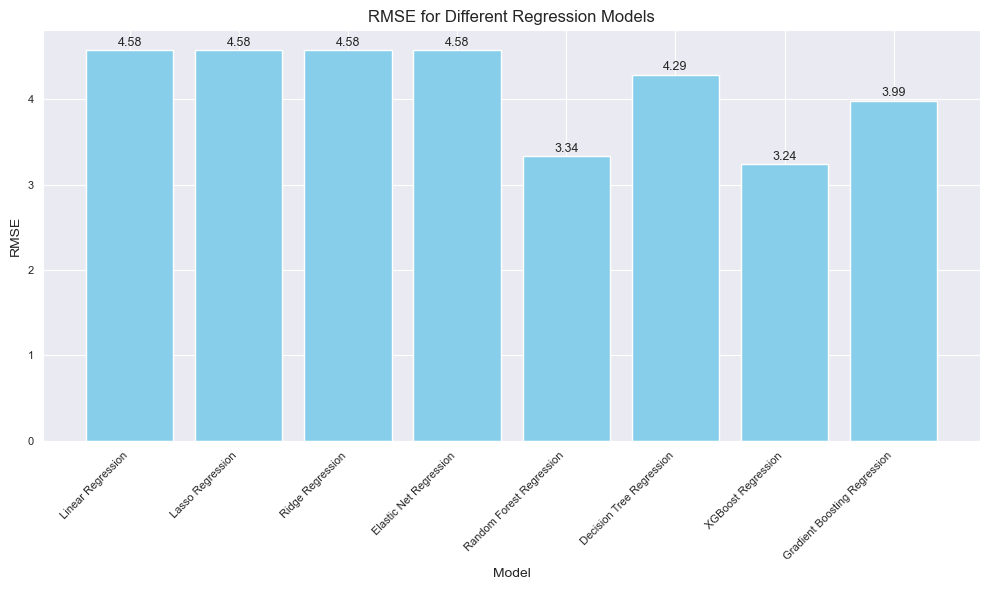

In [143]:
# Plotting RMSE
plt.figure(figsize=(10, 6))
rmse_bars = plt.bar(model_results["Model"], model_results["RMSE"], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
add_annotations(plt.gca(), model_results["RMSE"])
plt.tight_layout()
plt.show()

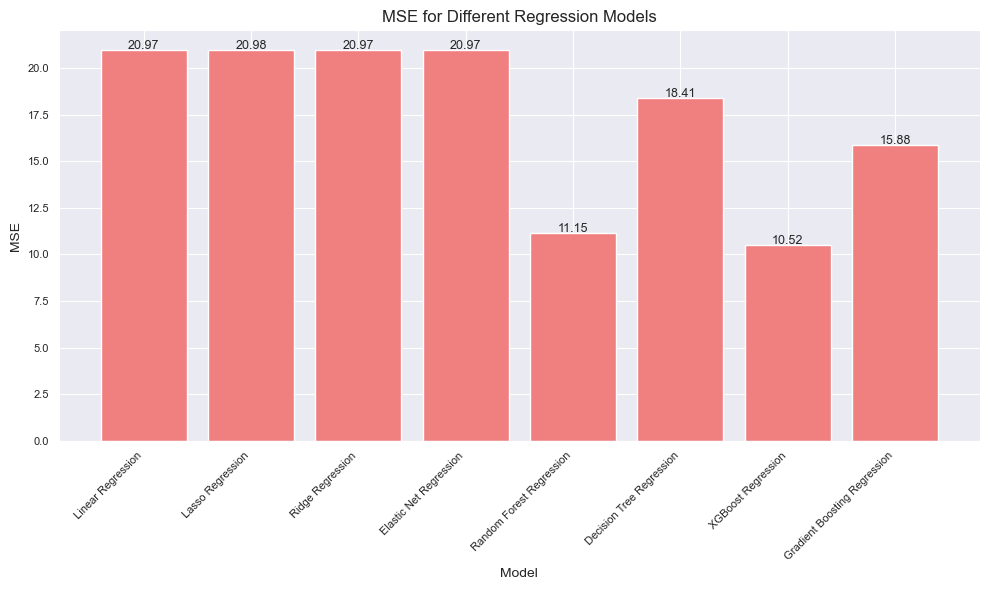

In [144]:
# Plotting MSE
plt.figure(figsize=(10, 6))
mse_bars = plt.bar(model_results["Model"], model_results["MSE"], color='lightcoral')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE for Different Regression Models')
plt.xticks(rotation=45, ha='right')
add_annotations(plt.gca(), model_results["MSE"])
plt.tight_layout()
plt.show()

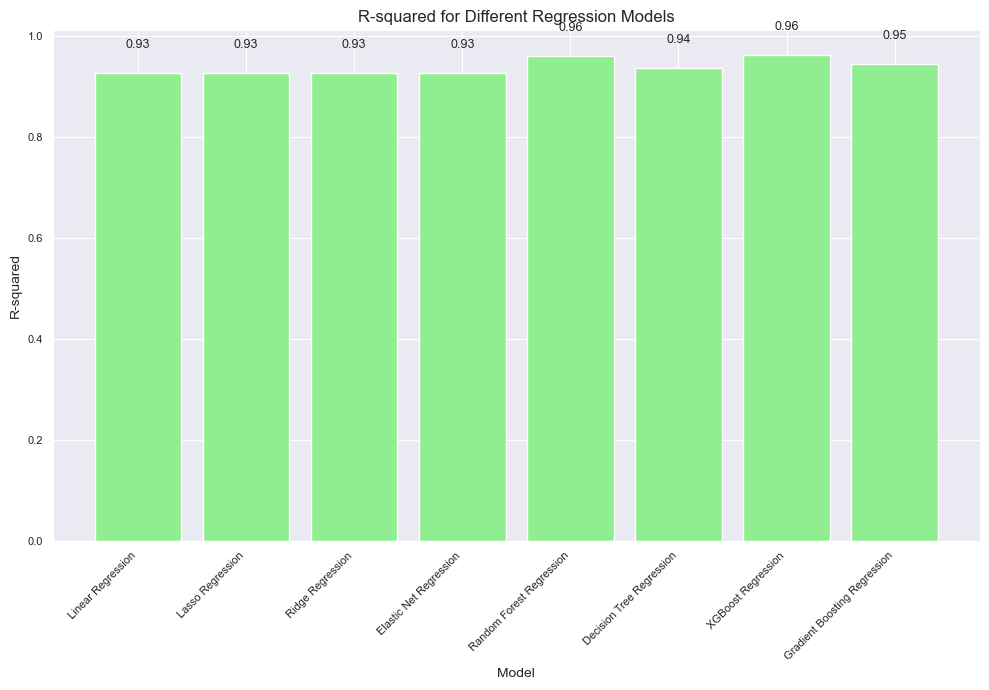

In [147]:
# Plotting R-squared
plt.figure(figsize=(10, 7))
rsquared_bars = plt.bar(model_results["Model"], model_results["R-squared"], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared for Different Regression Models')
plt.xticks(rotation=45, ha='right')
add_annotations(plt.gca(), model_results["R-squared"])
plt.tight_layout()
plt.show()

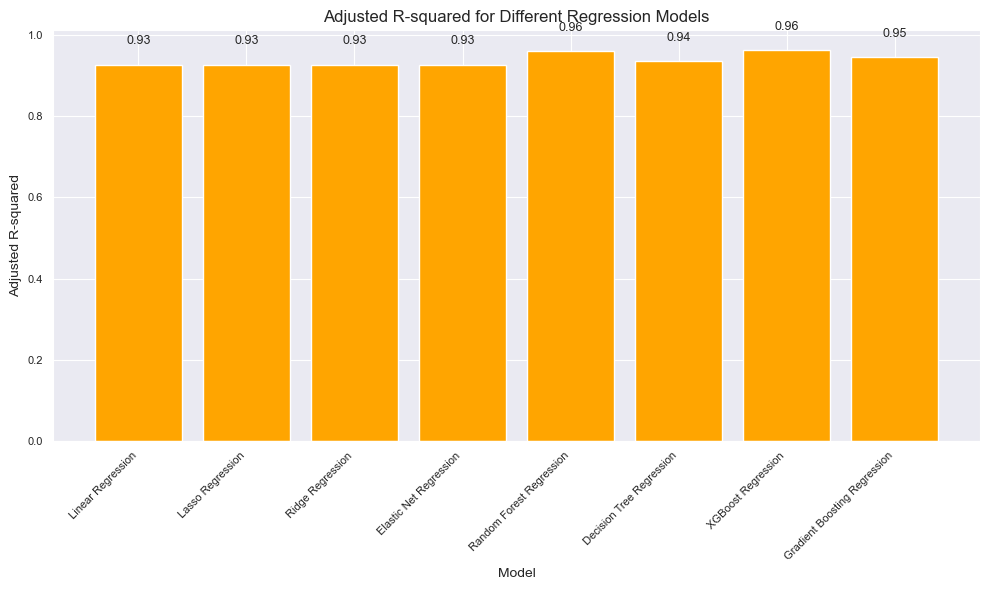

In [148]:
# Plotting Adjusted R-squared
plt.figure(figsize=(10, 6))
adj_rsquared_bars = plt.bar(model_results["Model"], model_results["Adjusted R-squared"], color='orange')
plt.xlabel('Model')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared for Different Regression Models')
plt.xticks(rotation=45, ha='right')
add_annotations(plt.gca(), model_results["Adjusted R-squared"])
plt.tight_layout()
plt.show()

In [149]:
# Linear Regression
y_pred_linear = linear_reg.predict(X_test)

# Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test)

# Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test)

# Elastic Net Regression
y_pred_elastic_net = elastic_net_reg.predict(X_test)

# Random Forest Regression
y_pred_rf = random_forest_reg.predict(X_test)

# Decision Tree Regression
y_pred_dt = decision_tree_reg.predict(X_test)

# XGBoost Regression
y_pred_xgb = xgboost_reg.predict(X_test)

# Gradient Boosting Regression
y_pred_gb = gradient_boosting_reg.predict(X_test)


In [150]:

# Creating DataFrames for each model to display actual and predicted values
results_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
results_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
results_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
results_elastic_net = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_elastic_net})
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
results_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
results_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
results_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})

In [151]:
print("Linear Regression:")
results_linear

Linear Regression:


Actual   Predicted
1087  434.73  436.432446
6321  444.74  447.750305
8050  457.09  455.155871
9523  435.39  446.090737
4466  441.91  440.043212
...      ...         ...
3403  440.53  433.078069
4216  443.79  435.396690
7082  480.53  482.689082
2214  436.16  439.511432
4991  452.31  448.750184

[1906 rows x 2 columns]

In [110]:
print("\nLasso Regression:")
results_lasso


Lasso Regression:


Actual   Predicted
1087  434.73  436.442916
6321  444.74  447.747067
8050  457.09  455.129260
9523  435.39  446.057008
4466  441.91  440.065475
...      ...         ...
3403  440.53  433.099758
4216  443.79  435.374675
7082  480.53  482.648038
2214  436.16  439.528913
4991  452.31  448.737615

[1906 rows x 2 columns]

In [111]:
print("\nRidge Regression:")
results_ridge


Ridge Regression:


Actual   Predicted
1087  434.73  436.432443
6321  444.74  447.750298
8050  457.09  455.155871
9523  435.39  446.090723
4466  441.91  440.043220
...      ...         ...
3403  440.53  433.078074
4216  443.79  435.396683
7082  480.53  482.689062
2214  436.16  439.511447
4991  452.31  448.750186

[1906 rows x 2 columns]

In [113]:
print("\nElastic Net Regression:")
results_elastic_net


Elastic Net Regression:


Actual   Predicted
1087  434.73  436.426383
6321  444.74  447.719936
8050  457.09  455.142029
9523  435.39  446.023411
4466  441.91  440.080926
...      ...         ...
3403  440.53  433.107275
4216  443.79  435.359437
7082  480.53  482.596432
2214  436.16  439.574514
4991  452.31  448.750759

[1906 rows x 2 columns]

In [114]:
print("\nRandom Forest Regression:")
results_rf


Random Forest Regression:


Actual  Predicted
1087  434.73   435.0619
6321  444.74   446.8764
8050  457.09   457.3614
9523  435.39   443.3371
4466  441.91   441.4299
...      ...        ...
3403  440.53   436.2460
4216  443.79   438.5657
7082  480.53   484.4088
2214  436.16   439.2454
4991  452.31   450.4881

[1906 rows x 2 columns]

In [115]:
print("\nDecision Tree Regression:")
results_dt


Decision Tree Regression:


Actual  Predicted
1087  434.73     438.73
6321  444.74     443.87
8050  457.09     457.72
9523  435.39     444.17
4466  441.91     441.68
...      ...        ...
3403  440.53     431.96
4216  443.79     439.34
7082  480.53     479.43
2214  436.16     443.66
4991  452.31     447.15

[1906 rows x 2 columns]

In [116]:
print("\nXGBoost Regression:")
results_xgb


XGBoost Regression:


Actual   Predicted
1087  434.73  436.199463
6321  444.74  448.688446
8050  457.09  457.174774
9523  435.39  441.842499
4466  441.91  441.485138
...      ...         ...
3403  440.53  437.202118
4216  443.79  442.500458
7082  480.53  483.263763
2214  436.16  437.708038
4991  452.31  450.237549

[1906 rows x 2 columns]

In [117]:
print("\nGradient Boosting Regression:")
results_gb


Gradient Boosting Regression:


Actual   Predicted
1087  434.73  433.997893
6321  444.74  446.110905
8050  457.09  455.530574
9523  435.39  441.786521
4466  441.91  441.994999
...      ...         ...
3403  440.53  435.030162
4216  443.79  434.559100
7082  480.53  482.885334
2214  436.16  441.587471
4991  452.31  446.354360

[1906 rows x 2 columns]

In [152]:
results = {
    'Linear Regression': (y_test, y_pred_linear),
    'Lasso Regression': (y_test, y_pred_lasso),
    'Ridge Regression': (y_test, y_pred_ridge),
    'Elastic Net Regression': (y_test, y_pred_elastic_net),
    'Random Forest Regression': (y_test, y_pred_rf),
    'Decision Tree Regression': (y_test, y_pred_dt),
    'XGBoost Regression': (y_test, y_pred_xgb),
    'Gradient Boosting Regression': (y_test, y_pred_gb)
}

In [153]:
mse_results = {model: mean_squared_error(actual, predicted) for model, (actual, predicted) in results.items()}

In [154]:
# Find the model with the lowest mean squared error
best_model = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_model]

In [157]:
best_model, best_mse

('XGBoost Regression', 10.524879618406267)